In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("Real_Estate.csv")

In [2]:
print(data)

               Transaction date  House age  \
0    2012-09-02 16:42:30.519336       13.3   
1    2012-09-04 22:52:29.919544       35.5   
2    2012-09-05 01:10:52.349449        1.1   
3    2012-09-05 13:26:01.189083       22.2   
4    2012-09-06 08:29:47.910523        8.5   
..                          ...        ...   
409  2013-07-25 15:30:36.565239       18.3   
410  2013-07-26 17:16:34.019780       11.9   
411  2013-07-28 21:47:23.339050        0.0   
412  2013-07-29 13:33:29.405317       35.9   
413  2013-08-01 09:49:41.506402       12.0   

     Distance to the nearest MRT station  Number of convenience stores  \
0                             4082.01500                             8   
1                              274.01440                             2   
2                             1978.67100                            10   
3                             1055.06700                             5   
4                              967.40000                             6   
.. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [6]:
data.isna().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [7]:
data['Transaction date'] = pd.to_datetime(data['Transaction date'], format='ISO8601')

In [8]:
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


As House age is the total age of house and it has an impact on house price prediction in a relevant way hence we cannot change/transform it , if it was age group we couldve rounded it

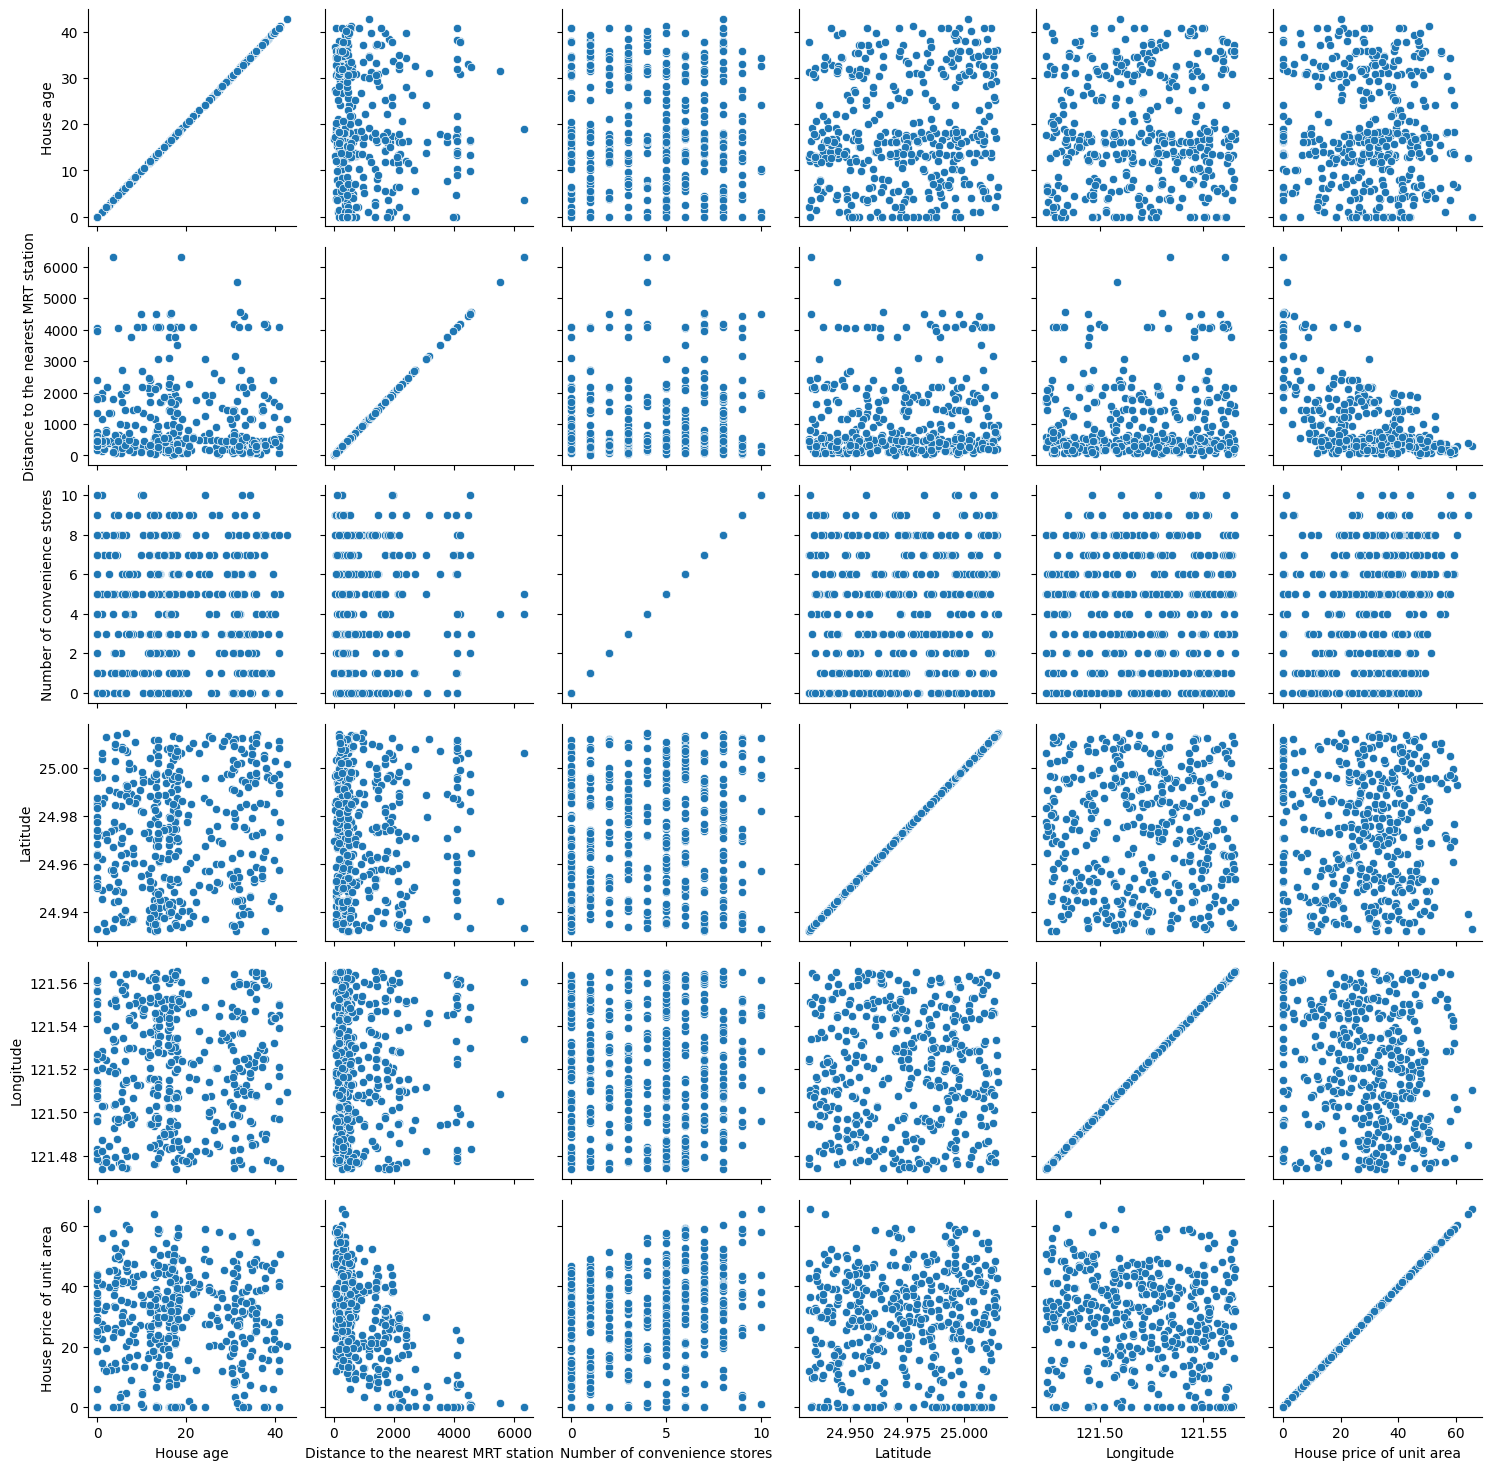

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.PairGrid(data)
g.map(sns.scatterplot)

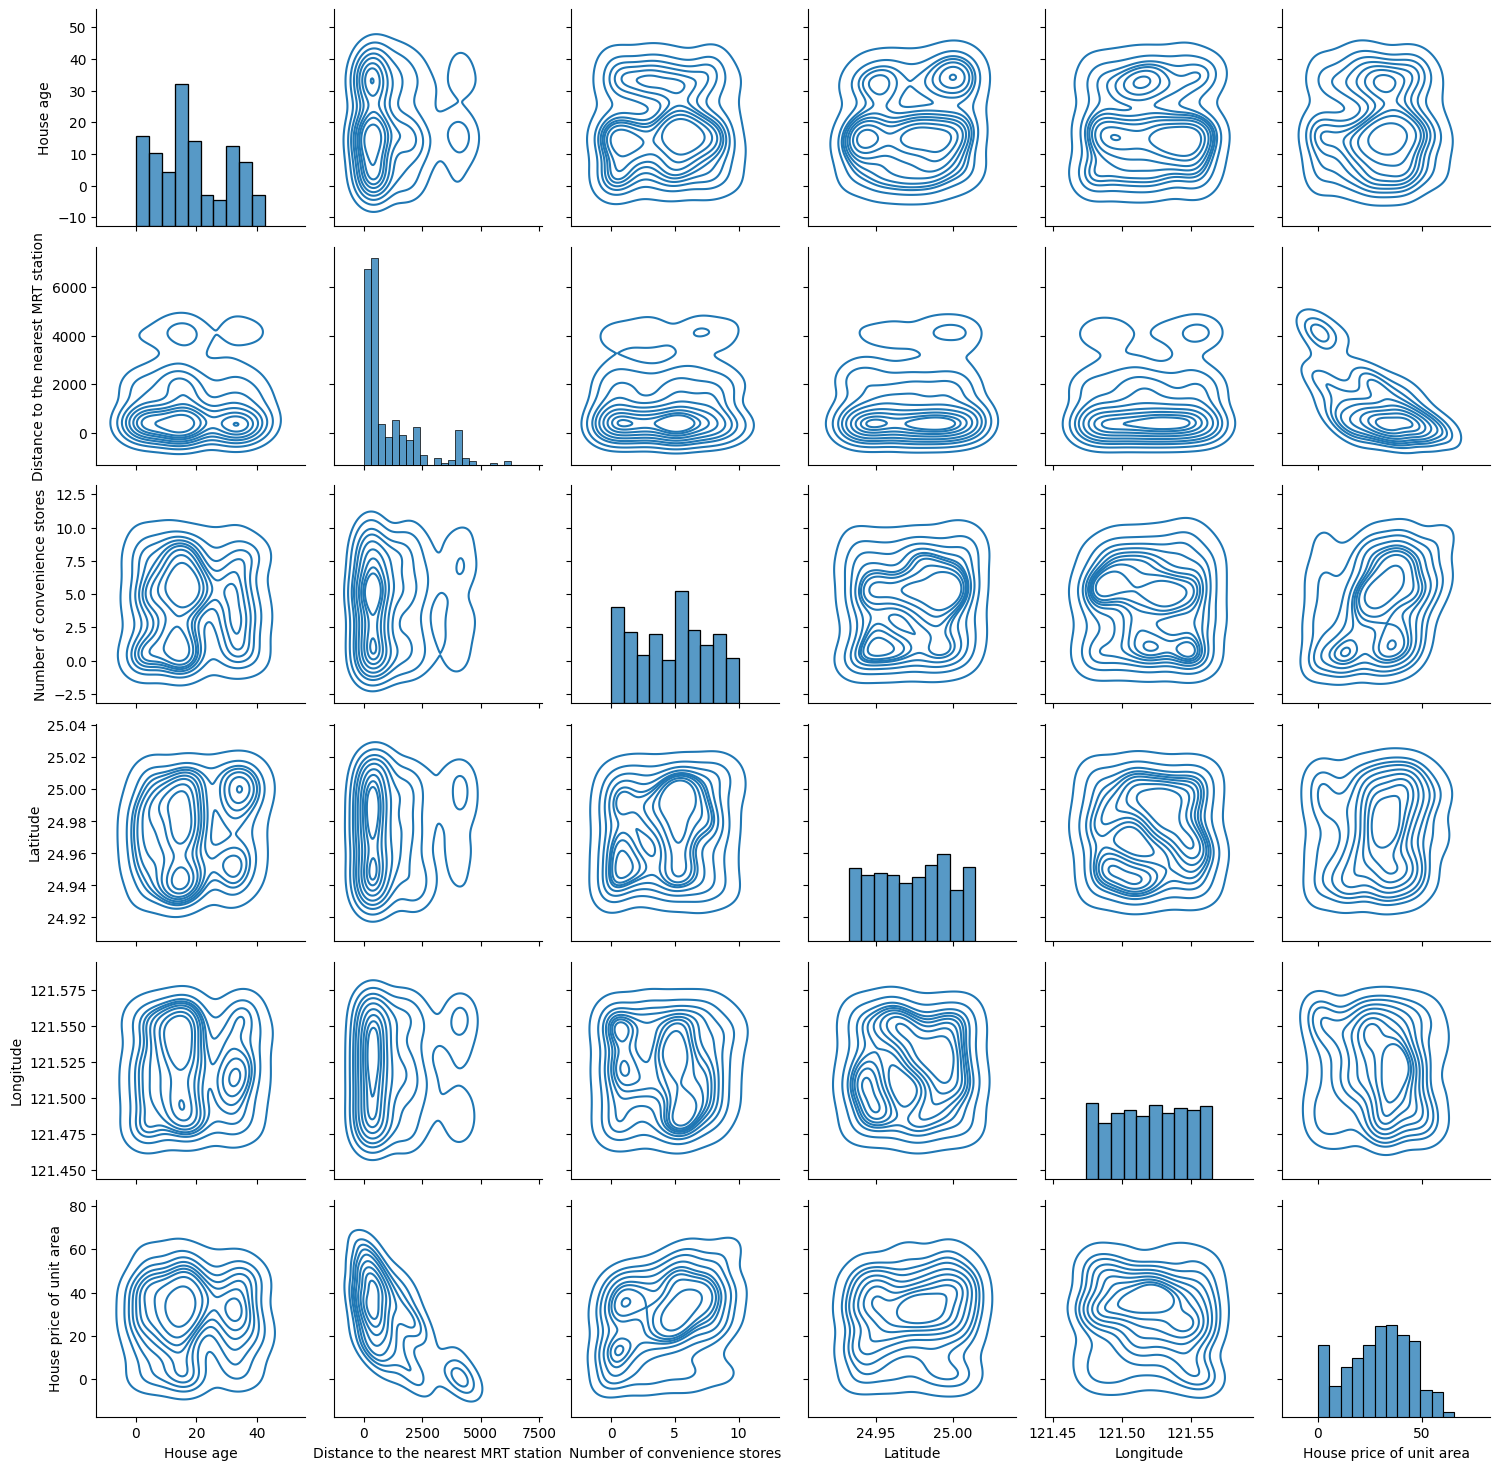

In [10]:
import warnings
warnings.filterwarnings('ignore')
h=sns.PairGrid(data)
h.map_upper(sns.kdeplot, lw=3, legend=False)
h.map_lower(sns.kdeplot)
h.map_diag(sns.histplot)


<Axes: >

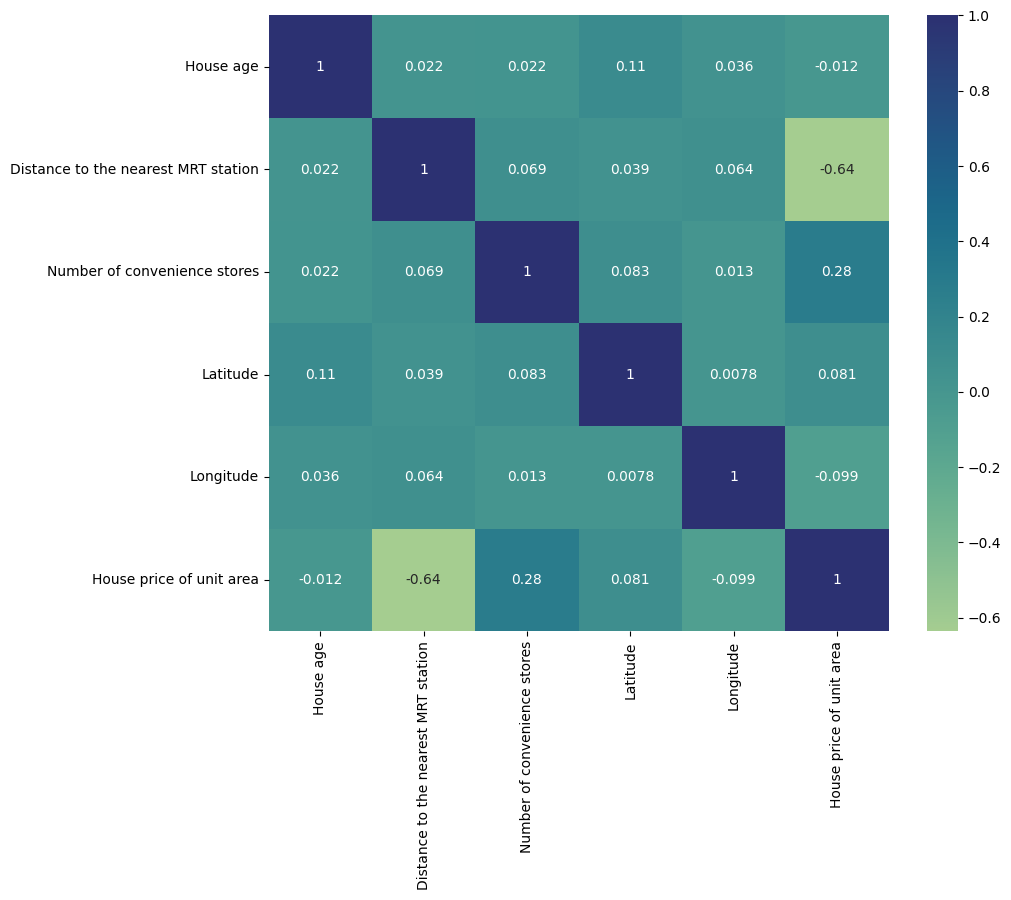

In [11]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True,cmap="crest")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
X = data.drop(columns=['House price of unit area', 'Transaction date'])
y = data['House price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mse,mae,rmse,r2

(124.60907371015088, 9.518530054594045, 11.162843441979776, 0.549565761429119)